In [38]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import random
from collections import deque
import matplotlib.pyplot as plt
import tensorflow_probability as tfp


physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model = tf.keras.models.load_model("./cartpole_20240309_221459/model_1000")

env = gym.make('CartPole-v1', render_mode="human")
state = env.reset()
state = np.array([state[0]])

total_reward = []
reward_ = 0
for _ in range(10):
    done = False

    while reward_ < 500:
        traj_info = model(state)
        action = traj_info['a'].numpy()
        state, reward, done, truncated, info = env.step(action[0]) # 更新状态信息
        reward_ += reward
        
#         print(reward_)
        if done or reward_ == 500:
            state = env.reset()[0]
            total_reward.append(reward_)
            print(reward_)
            reward_ = 0
            state = np.array([state])
            break
            
        state = np.array([state])
        
        
print(f"mean reward = {np.mean(total_reward)}")
env.close()

500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
500.0
mean reward = 500.0


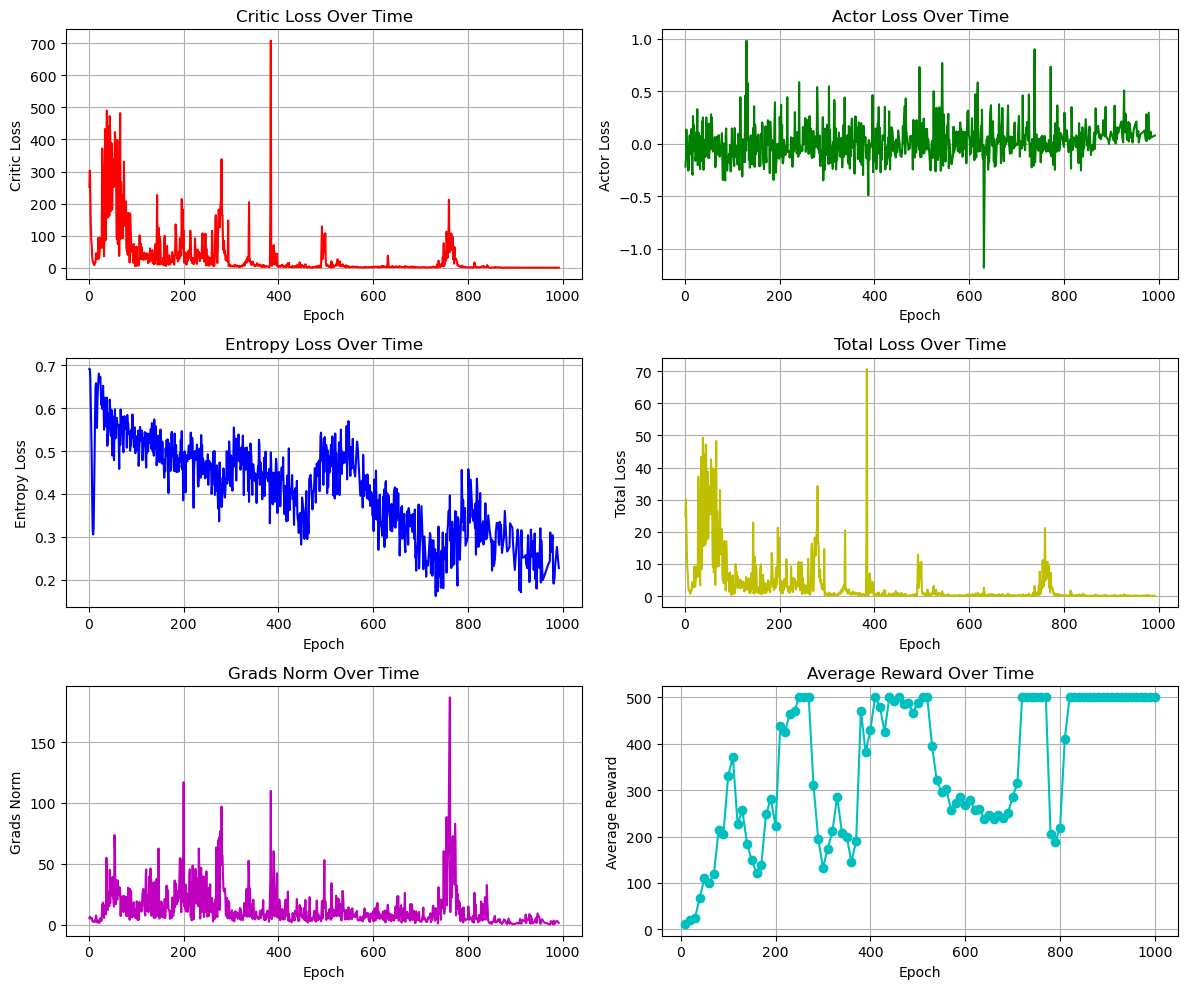

In [42]:
import matplotlib.pyplot as plt
import re

# Read the log data from a file.
with open('./cartpole_20240309_221459/train_log', 'r') as file:
    log_data = file.readlines()

# Initialize lists to store the parsed data.
epochs, critic_losses, actor_losses, entropy_losses, total_losses, grads_norms, avg_rewards = [], [], [], [], [], [], []

# Regex patterns for extracting metrics and rewards.
pattern_metrics = re.compile(r'Epoch (\d+)/\d+ completed. critic_loss = ([\d.]+)\s+actor_loss = ([\d.\-]+)\s+entropy_loss = ([\d.]+)\s+total_loss = ([\d.]+)\s+grads_norm = ([\d.]+)')
pattern_rewards = re.compile(r'Average reward at epoch (\d+): ([\d.]+)')

# Iterate through each line of the log data.
for line in log_data:
    match_metrics = pattern_metrics.search(line)
    match_rewards = pattern_rewards.search(line)
    
    if match_metrics:
        epochs.append(int(match_metrics.group(1)))
        critic_losses.append(float(match_metrics.group(2)))
        actor_losses.append(float(match_metrics.group(3)))
        entropy_losses.append(float(match_metrics.group(4)))
        total_losses.append(float(match_metrics.group(5)))
        grads_norms.append(float(match_metrics.group(6)))
        
    if match_rewards:
        # Only include rewards at matching intervals (every 10 epochs).
        avg_rewards.append((int(match_rewards.group(1)), float(match_rewards.group(2))))

# Prepare the plot.
plt.figure(figsize=(12, 10))

# Plot critic_loss.
plt.subplot(3, 2, 1)
plt.plot(epochs, critic_losses, 'r-')
plt.xlabel('Epoch')
plt.ylabel('Critic Loss')
plt.title('Critic Loss Over Time')
plt.grid(True)

# Plot actor_loss.
plt.subplot(3, 2, 2)
plt.plot(epochs, actor_losses, 'g-')
plt.xlabel('Epoch')
plt.ylabel('Actor Loss')
plt.title('Actor Loss Over Time')
plt.grid(True)

# Plot entropy_loss.
plt.subplot(3, 2, 3)
plt.plot(epochs, entropy_losses, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Entropy Loss')
plt.title('Entropy Loss Over Time')
plt.grid(True)

# Plot total_loss.
plt.subplot(3, 2, 4)
plt.plot(epochs, total_losses, 'y-')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Total Loss Over Time')
plt.grid(True)

# Plot grads_norm.
plt.subplot(3, 2, 5)
plt.plot(epochs, grads_norms, 'm-')
plt.xlabel('Epoch')
plt.ylabel('Grads Norm')
plt.title('Grads Norm Over Time')
plt.grid(True)

# Plot avg_reward.
rewards_epochs, rewards_values = zip(*avg_rewards)  # Unzip the list of tuples into two lists.
plt.subplot(3, 2, 6)
plt.plot(rewards_epochs, rewards_values, 'c-o')  # 'c-o' will plot cyan lines with circle markers.
plt.xlabel('Epoch')
plt.ylabel('Average Reward')
plt.title('Average Reward Over Time')
plt.grid(True)

# Adjust and show the plot.
plt.tight_layout()
plt.show()